# 공모전 추천 데이터 EDA

풍력 : 바람의 에너지를 변환시켜 전기를 생산하는 설비

https://www.knrec.or.kr/biz/introduce/new_policy/statistics.do?gubun=A

In [145]:
# koreanize-matplotlib 라이브러리 설치
%pip install koreanize-matplotlib -q
import koreanize_matplotlib

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# 1. 공모전 추천 데이터

In [146]:
import pandas as pd

# 파일 경로 설정
wind_power_file = '../wind_data/한국남부발전(주)_한경풍력 일별 발전량_20250228.csv'
wind_speed_file = '../wind_data/한국남부발전(주)_한경풍력 일평균 풍속데이터_20250228.csv'
facility_file = '../wind_data/한국남부발전(주)_에너지원별 신재생에너지 발전설비 현황_20250312.csv'

# CSV 파일 불러오기
df_power = pd.read_csv(wind_power_file, encoding='euc-kr')
df_wind = pd.read_csv(wind_speed_file, encoding='euc-kr')
df_facility = pd.read_csv(facility_file, encoding='euc-kr')

# 데이터 확인
print("발전량 데이터")
display(df_power.head())

print("풍속 데이터")
display(df_wind.head())

print("설비 현황 데이터")
df_facility["지역"] = "제주특별자치도"
# 공백 제거 후 풍력 필터링
df_facility['에너지원'] = df_facility['에너지원'].str.replace(" ", "")
df_facility = df_facility[df_facility['에너지원'] == '풍력']
# print(df_facility["에너지원"].unique())
display(df_facility.head())

발전량 데이터


,구분,한경1호기(kWh),한경2호기(kWh),한경3호기(kWh),한경5호기(kWh),한경6호기(kWh),한경7호기(kWh),한경8호기(kWh),한경9호기(kWh)
0,2018-01-01,16001,17281,15139,0,24508,5872,4592,28460
1,2018-01-02,8173,6611,9935,0,21904,19780,12032,11704
2,2018-01-03,21213,33000,29205,0,54872,51956,35248,60116
3,2018-01-04,20925,21889,18492,0,35036,33488,0,37224
4,2018-01-05,24439,25177,23986,0,41256,39212,0,44996


풍속 데이터


,구분,한경1호기,한경2호기,한경3호기,한경5호기,한경6호기,한경7호기,한경8호기,한경9호기
0,2018-01-01,7.7,7.9,7.4,6.5,8.2,7.5,7.8,8.8
1,2018-01-02,6.4,5.8,6.4,6.6,8.1,7.8,7.7,6.1
2,2018-01-03,10.2,10.9,9.9,9.6,11.9,11.7,11.3,12.6
3,2018-01-04,8.7,8.9,8.0,7.9,9.5,9.5,8.7,9.8
4,2018-01-05,9.3,9.4,9.1,7.4,10.2,10.4,8.8,10.6


설비 현황 데이터


,에너지원,구분,발전소명,용량(MW),준공년도,비 고,지역
0,풍력,자체,한경풍력 1단계(1~4호기),6.0,2004,FIT,제주특별자치도
1,풍력,자체,한경풍력 2단계(5~9호기),15.0,2007,FIT,제주특별자치도
2,풍력,자체,성산풍력 1단계(1~6호기),12.0,2009,FIT,제주특별자치도
3,풍력,자체,성산풍력 2단계(7~10호기),8.0,2010,RPS,제주특별자치도
4,풍력,SPC,태백풍력(1~9호기),18.0,2012,RPS,제주특별자치도


In [147]:
# 수치형 컬럼 요약 통계
df_power.describe()

,한경1호기(kWh),한경2호기(kWh),한경3호기(kWh),한경5호기(kWh),한경6호기(kWh),한경7호기(kWh),한경8호기(kWh),한경9호기(kWh)
count,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000,2615.000000
mean,8039.901338,8350.368260,8601.183556,10649.653920,12910.931549,15270.918929,14288.716252,16787.723518
std,8922.417530,9787.920101,9239.281217,15433.684979,16651.229659,17143.690973,16595.879707,18368.588478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,614.000000,178.000000,725.000000,0.000000,0.000000,1488.000000,1012.000000,1904.000000
50%,4733.000000,4183.000000,5371.000000,2824.000000,5236.000000,8772.000000,7744.000000,9680.000000
75%,12937.500000,13886.500000,14095.000000,16102.000000,19914.000000,24654.000000,22108.000000,26828.000000
max,36478.000000,36480.000000,36474.000000,71360.000000,71980.000000,82896.000000,91296.000000,91296.000000


# 2. 추가 조사 데이터

In [148]:
wind_location_file = '../wind_data/한국에너지공단_풍력기 위치정보_20221231.csv'
df_location = pd.read_csv(wind_location_file, encoding='euc-kr')
display(df_location.sample(5))

,단지번호,단지명,풍력기번호(임시),준공일,분류,주소,엑스좌표(GRS80_C_x),와이좌표(GRS80_C_y),위도(lat),경도(lon)
313,45,호남,4,2014-04-01,육상,전라남도 영광군 백수읍 하사리 3186-12,297952.1798,139268.0900,35.276295,126.332476
20,2,전북,10,2007-11-01,육상,전라북도 부안군,372869.9001,157007.9035,35.952417,126.523465
538,85,경주2,7,2017-12-01,육상,경상북도 경주시 양남면 외남로 1281-24 / 경주시 양남면 효동리 산501-2,349714.5054,414471.6300,35.721323,129.370163
446,67,의령,2,2016-04-01,육상,경상남도 의령군 가례면 가례로10동길 9,312301.0350,312077.5102,35.401166,128.233753
307,44,대명 영암,18,2013-12-01,육상,전라남도 영암군 금정면 활성산길 219,245777.5614,178493.0114,34.807619,126.764955


In [149]:
# "광역자치단체(시·도)" 단위만 추출
# 시도명 리스트 (광역단체 이름)
province_list = [
    '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시',
    '대전광역시', '울산광역시', '세종특별자치시',
    '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
    '경상북도', '경상남도', '제주특별자치도',
    '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종',
    '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'
]

def extract_province_from_address(address):
    if isinstance(address, str):
        for name in province_list:
            if address.startswith(name):
                return name
    return None

df_location['광역지역'] = df_location['주소'].apply(extract_province_from_address)

In [150]:
df_location['광역지역'].unique()

array(['제주특별자치도', '전라북도', '경상북도', '강원도', '부산광역시', '전라남도', '경기도', '울산광역시',
       '인천광역시', '경상남도', None, '충청남도', '전남', '경남', '강원'], dtype=object)

In [151]:
len(df_location)

780

In [152]:
# df_location[df_location["광역지역"]=="제주특별자치도"]

# EDA 

## (1) 결측치 확인

In [153]:
def print_missing_columns(df, df_name="데이터프레임"):
    null_counts = df.isnull().sum()
    missing_cols = null_counts[null_counts > 0]
    
    if missing_cols.empty:
        print(f"{df_name}에는 결측치가 없습니다.")
    else:
        print(f"{df_name} 중 결측치가 있는 컬럼:")
        for col, count in missing_cols.items():
            print(f"  - {col} ({count}개)")

print_missing_columns(df_power, "df_power")
print_missing_columns(df_wind, "df_wind")
print_missing_columns(df_facility, "df_facility")
print_missing_columns(df_location, "df_location")

df_power에는 결측치가 없습니다.
df_wind에는 결측치가 없습니다.
df_facility에는 결측치가 없습니다.
df_location 중 결측치가 있는 컬럼:
  - 주소 (1개)
  - 광역지역 (1개)


In [154]:
# '광역지역' 컬럼이 None(또는 NaN)인 행만 출력
df_location[df_location['광역지역'].isnull()]

,단지번호,단지명,풍력기번호(임시),준공일,분류,주소,엑스좌표(GRS80_C_x),와이좌표(GRS80_C_y),위도(lat),경도(lon),광역지역
241,31,대불풍력,1,2012-01-01,육상,NaN,241519.7858,146592.3205,34.768068,126.4166,None


## (2) 지역별 풍력 발전소 분포

In [155]:
%pip install folium -q

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [156]:
import folium

# 지도 중앙 좌표: 대한민국 중심 근처
map_center = [36.5, 127.8]

# folium 지도 객체 생성
m = folium.Map(location=map_center, zoom_start=7)

# 각 풍력 발전 단지를 지도에 표시
for i, row in df_location.iterrows():
    name = row['단지명']
    lat = row['위도(lat)']
    lon = row['경도(lon)']
    capacity = row.get('풍력기번호(임시)', 'N/A')

    folium.Marker(
        location=[lat, lon],
        popup=f"{name} (풍력기 {capacity}기)",
        tooltip=name,
        icon=folium.Icon(color='blue', icon='wind', prefix='fa')
    ).add_to(m)

# 지도 출력
m

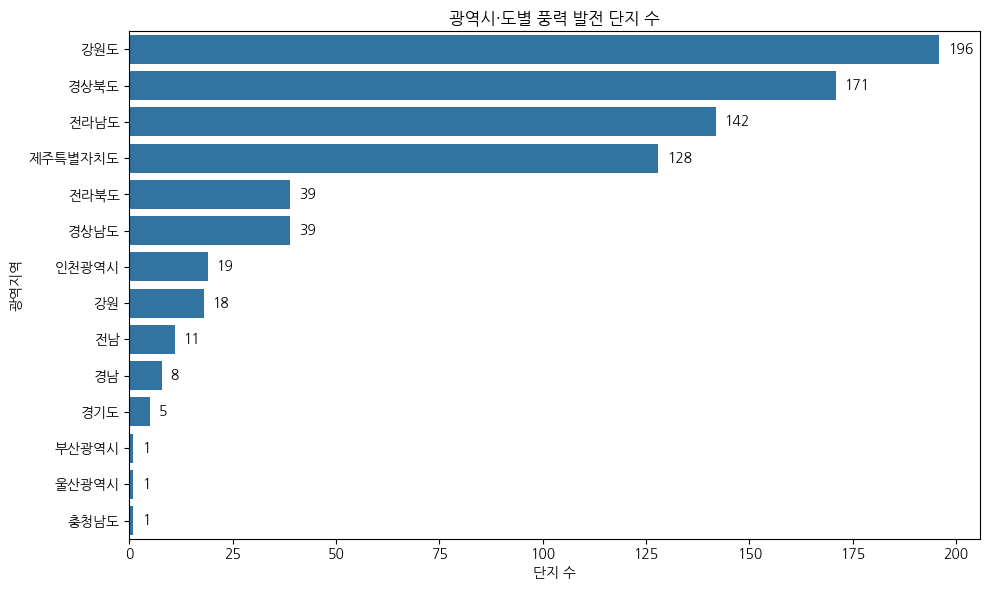

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

region_counts = df_location['광역지역'].value_counts().reset_index()
region_counts.columns = ['광역지역', '풍력단지수']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='풍력단지수', y='광역지역', data=region_counts)

# 막대 위에 개수 표시
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 2, 
             p.get_y() + p.get_height() / 2, 
             f'{int(width)}', 
             va='center')

plt.title("광역시·도별 풍력 발전 단지 수")
plt.xlabel("단지 수")
plt.ylabel("광역지역")
plt.tight_layout()
plt.show()

## (3) 날짜 범위 일치 여부

In [158]:
print(df_power['구분'].min(), df_power['구분'].max())
print(df_wind['구분'].min(), df_wind['구분'].max())

2018-01-01 2025-02-28
2018-01-01 2025-02-28


## (3) 발전량/풍속 값 이상치 (음수, 0값, 극단값 등)

In [159]:
%pip install matplotlib -q

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [160]:
# 발전량 데이터: 일자별 터빈별 long-form 변환
df_power['일자'] = pd.to_datetime(df_power['구분'])
df_power_melted = df_power.drop(columns='구분').melt(id_vars='일자', var_name='터빈', value_name='발전량(kWh)')

# 풍속 데이터: 일자별 터빈별 long-form 변환
df_wind['일자'] = pd.to_datetime(df_wind['구분'])
df_wind_melted = df_wind.drop(columns='구분').melt(id_vars='일자', var_name='터빈', value_name='풍속(m/s)')

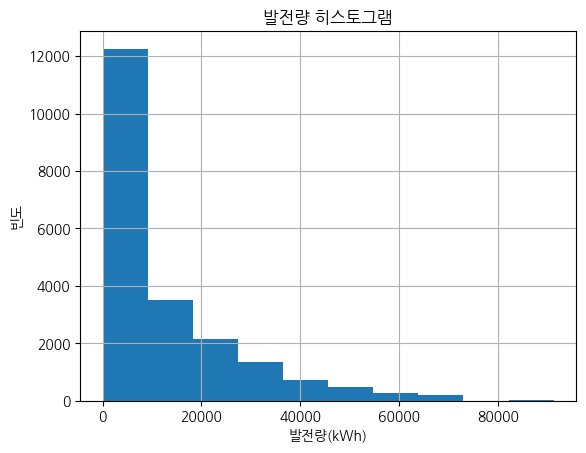

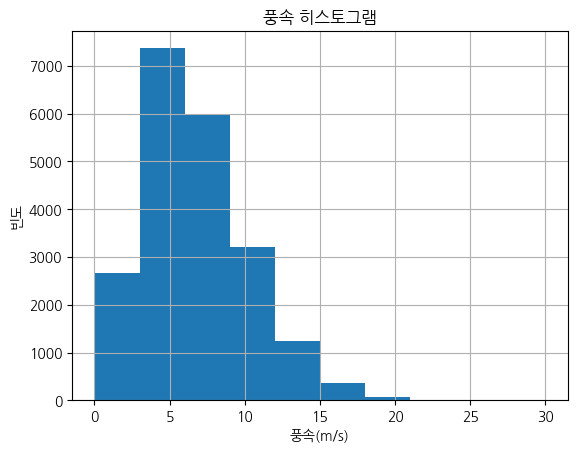

In [161]:
import matplotlib.pyplot as plt

# 발전량 히스토그램
df_power_melted['발전량(kWh)'].hist()
plt.xlabel('발전량(kWh)')
plt.ylabel('빈도')
plt.title('발전량 히스토그램')
plt.show()

# 풍속 히스토그램
df_wind_melted['풍속(m/s)'].hist()
plt.xlabel('풍속(m/s)')
plt.ylabel('빈도')
plt.title('풍속 히스토그램')
plt.show()

In [162]:
# 1. 0 또는 비정상 발전량 탐색
df_power_melted[df_power_melted['발전량(kWh)'] <= 0].value_counts('터빈')

# 발전량이 0이거나 음수인 경우 특정 발전기에서 반복적으로 발생하는지 확인
# 특정 날에 집중되어 있다면 날씨 요인, 특정 발전기에 집중되면 고장 가능성

# 한경5호기에서 무려 998회 0발전 발생 → 가장 문제 있는 터빈
# 한경6~9호기도 300~600회 수준으로 0값 있음
# 이건 고장, 노후, 입지불리, 기상조건 취약 등 원인 추정 가능
# → 해당 발전기들에 대해 저효율기 변수 생성 가능

터빈
한경5호기(kWh)    998
한경6호기(kWh)    680
한경2호기(kWh)    546
한경8호기(kWh)    464
한경7호기(kWh)    393
한경3호기(kWh)    369
한경1호기(kWh)    335
한경9호기(kWh)    296
Name: count, dtype: int64

In [163]:
# 하루 전체가 0인 날 찾기 (→ 날씨 문제 or 전체 정비 등)

# 일자별 총 발전량
daily_total = df_power_melted.groupby('일자')['발전량(kWh)'].sum()

# 발전량이 0인 날
all_zero_days = daily_total[daily_total == 0].index
print(f"모든 터빈이 발전하지 않은 날 수: {len(all_zero_days)}")


모든 터빈이 발전하지 않은 날 수: 24


In [164]:
# 각 터빈의 총 기록 수 & 0인 기록 수
turbine_zero_ratio = (
    df_power_melted
    .assign(발전_0=lambda x: x['발전량(kWh)'] == 0)
    .groupby('터빈')['발전_0']
    .agg(['sum', 'count'])
    .assign(비율=lambda x: x['sum'] / x['count'])
    .sort_values('터빈', ascending=True)
)

turbine_zero_ratio


,sum,count,비율
터빈,,,
한경1호기(kWh),335,2615,0.128107
한경2호기(kWh),546,2615,0.208795
한경3호기(kWh),369,2615,0.141109
한경5호기(kWh),998,2615,0.381644
한경6호기(kWh),680,2615,0.260038
한경7호기(kWh),393,2615,0.150287
한경8호기(kWh),464,2615,0.177438
한경9호기(kWh),296,2615,0.113193


<Axes: xlabel='일자'>

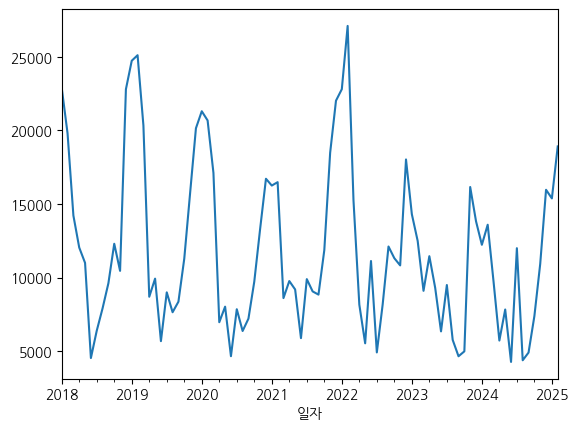

In [165]:
# 2. 발전량의 시간 추세 분석
df_power_melted['일자'] = pd.to_datetime(df_power_melted['일자'])
df_power_melted.groupby(df_power_melted['일자'].dt.to_period("M"))['발전량(kWh)'].mean().plot()

# 월별 평균 발전량을 시계열로 보면 계절성/주기성 확인 가능
# 예: 겨울철 풍력량 증가 → 예측모델에 계절성 반영

# 겨울철에 발전량이 높고 여름엔 낮은 경향 반복됨 → 계절성 뚜렷
# 특히 2022년 겨울에 큰 피크 존재 → 한파, 강풍 시기일 가능성
# 예측 모델에 월, 계절 파생 변수 추가 시 정확도 향상 기대됨

<Axes: xlabel='터빈'>

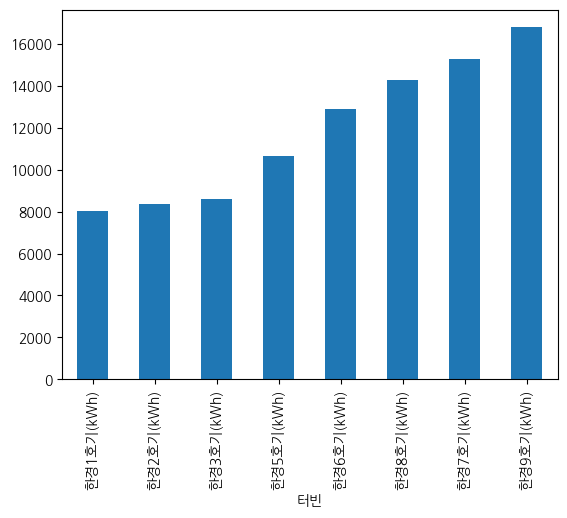

In [ ]:
# 3. 발전기별 발전량 비교
df_power_melted.groupby('터빈')['발전량(kWh)'].mean().sort_values().plot(kind='bar')

# 낮은 발전량을 지속적으로 기록하는 발전기 식별 → 노후화 또는 설치 위치 불리      $
# 이걸 기반으로 발전기 성능별 파생변수 생성 가능 (예: '고효율기', '저효율기')

# 한경1호기, 한경2호기, 한경3호기는 평균 발전량이 확연히 낮음
# 반면 한경9호기는 가장 높은 발전 효율
# 발전기 성능에 차이가 존재하며, 발전기별 bias correction 또는 클러스터링 분리 학습 고려 가능

### 1. 발전량 히스토그램 (발전량(kWh))
- 대부분의 발전량이 0~2만 kWh 이하에 몰려 있음.

- 0에 매우 가까운 값들이 많이 존재 → 0 또는 무발전일 수 있음.

- 우측에 소수의 극단적인 고발전량 (예: 6만~9만 kWh) 존재 → 극단값 (outlier) 가능성.

평가:
대부분의 발전량이 낮은 쪽에 집중된 우측으로 꼬리진 분포 (right-skewed) → 정상.

0값이 많으면 센서 오류, 정비일, 정전, 무풍일일 수 있음 → 별도 분류 필요.

극단적인 값은 정상 발전소인지 확인 필요. 단순 노이즈인지, 큰 발전소인지 확인.

---
### 🌬️ 2. 풍속 히스토그램 (풍속(m/s))
- 풍속 4~7 m/s에 데이터가 집중돼 있음 → 풍력발전 적정 범위에 있음 

- 0~2 m/s 구간도 일부 존재 → 바람 없는 날

- 20 m/s 이상은 거의 없음 → 극한 기상 상황은 드물다는 의미

평가:
자연현상으로서의 풍속 분포로 매우 적절한 정상적 분포.

풍속이 0~2일 경우 발전량도 거의 없을 것 → 학습 시 공변성 확인 필요

극단치 거의 없음 → 모델 안정성에 유리
---
### 종합 평가 (5줄 요약)
발전량은 우측 꼬리 분포 + 0값 다수, 풍속은 정상적인 종 모양 분포로 해석됨.

발전량의 0 또는 극단값은 원인 파악 후 제거/보정 필요.

풍속은 모델 입력 변수로 바로 활용해도 무방함.

두 분포 모두 모델링 전 확인해야 할 스케일, 정규화, 이상치 처리 방향성을 잘 보여줌.

전처리 판단을 돕는 유의미한 분포 시각화였고, 결과 해석도 명확하게 가능함!


## (4) 풍속 ↔ 발전량 산점도 (전체)
### 관찰된 패턴:
전반적인 양의 상관관계 존재: 풍속이 증가할수록 발전량도 상승함

10~15 m/s 구간에서 발전량 밀집 → 가장 효율적인 풍속 구간

0~3 m/s 구간에도 일부 발전값 존재 → 저풍속에서도 일부 출력

20 m/s 이상에선 급격한 발전량 감소 or 산점 분산 → 제어 시스템 작동 or 과풍 차단

### 이상 패턴:
풍속이 0인데 발전량이 존재하는 점 → 센서 오류 또는 데이터 mismatch 가능성

발전량이 0인데 풍속은 있는 경우도 존재 → 발전기 정지 or 유지보수일 가능성

### 5줄 요약
풍속과 발전량 간 양의 관계가 시각적으로 명확히 확인됨, 모델 설계에 중요한 근거 제공됨.

단, 일부 비정상 구간(0 풍속, 높은 발전량 등)은 전처리로 제거하거나 마스킹 고려 필요.

풍속이 10~15m/s일 때 발전량이 최대화되는 경향 → 최적 운영조건 분석 가능.

inner join 기준이 잘 맞아서 데이터 정합성도 좋음.

모델 학습 전에 이상치 마스킹 / 풍속별 구간화(비닝)도 시도해볼 가치 있음.

In [167]:
%pip install seaborn -q

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [168]:
print("df_power_melted 컬럼:", df_power_melted.columns.tolist())
print("df_wind_melted 컬럼:", df_wind_melted.columns.tolist())

df_power_melted 컬럼: ['일자', '터빈', '발전량(kWh)']
df_wind_melted 컬럼: ['일자', '터빈', '풍속(m/s)']


In [169]:
print("df_power_melted의 터빈")
print(df_power_melted["터빈"].head())
print()
print("df_wind_melted의 터빈")
print(df_wind_melted["터빈"].head())

df_power_melted의 터빈
0    한경1호기(kWh)
1    한경1호기(kWh)
2    한경1호기(kWh)
3    한경1호기(kWh)
4    한경1호기(kWh)
Name: 터빈, dtype: object

df_wind_melted의 터빈
0    한경1호기
1    한경1호기
2    한경1호기
3    한경1호기
4    한경1호기
Name: 터빈, dtype: object


In [170]:
df_power_melted['터빈'] = df_power_melted['터빈'].str.replace('(kWh)', '', regex=False).str.strip()

In [171]:
# inner join을 통해 '일자' + '터빈' 기준으로 병합
df_merged = pd.merge(df_power_melted, df_wind_melted, on=['일자', '터빈'], how='inner')

# 결과 확인
print("병합된 데이터프레임 (df_merged)")
display(df_merged.head())

병합된 데이터프레임 (df_merged)


,일자,터빈,발전량(kWh),풍속(m/s)
0,2018-01-01,한경1호기,16001,7.7
1,2018-01-02,한경1호기,8173,6.4
2,2018-01-03,한경1호기,21213,10.2
3,2018-01-04,한경1호기,20925,8.7
4,2018-01-05,한경1호기,24439,9.3


<Axes: xlabel='풍속(m/s)', ylabel='발전량(kWh)'>

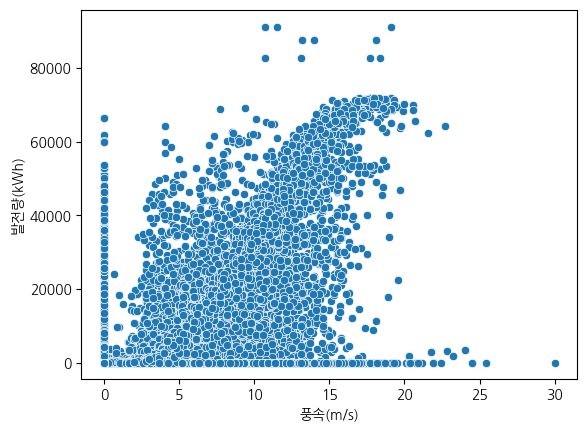

In [172]:
import seaborn as sns
sns.scatterplot(data=df_merged, x='풍속(m/s)', y='발전량(kWh)')

## (5) 터빈별 풍속 ↔ 발전량 패턴 비교

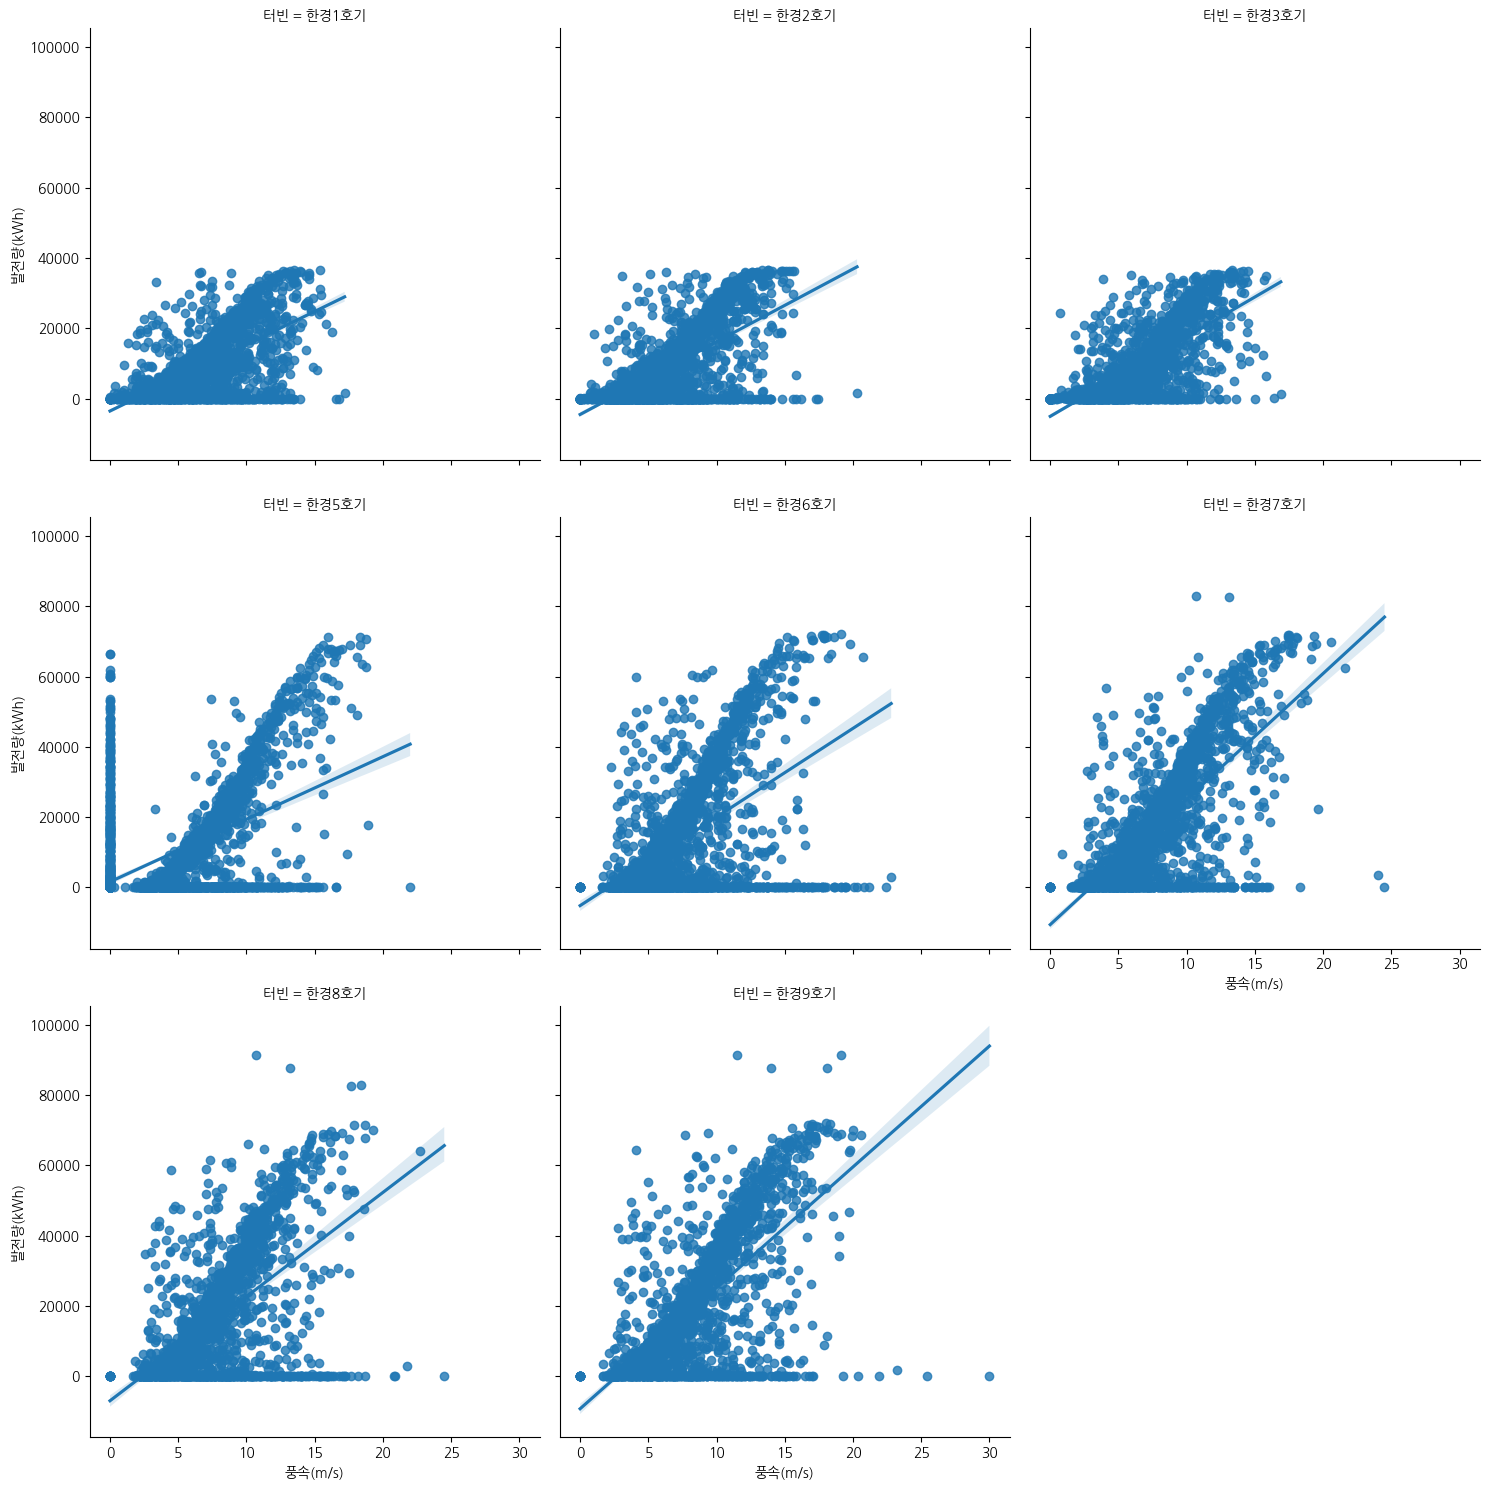

In [173]:
sns.lmplot(data=df_merged, x='풍속(m/s)', y='발전량(kWh)', col='터빈', col_wrap=3)
# 설비정보(지역, 용량 등) 병합 고려, 터빈 → 지역/용량/준공년도 매핑 함수 생성 고려
# lmplot : 추세선(회귀선)을 보여주는 시각화

## (6) 풍속³ vs 발전량 → 비선형 확인

<Axes: xlabel='풍속^3', ylabel='발전량(kWh)'>

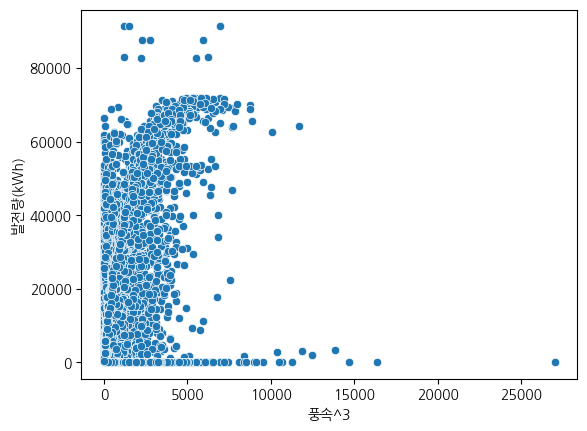

In [174]:
df_merged['풍속^3'] = df_merged['풍속(m/s)'] ** 3
sns.scatterplot(x='풍속^3', y='발전량(kWh)', data=df_merged)

## (7) 지역별 발전량 평균 비교

In [175]:
df_merged["터빈"].unique()

array(['한경1호기', '한경2호기', '한경3호기', '한경5호기', '한경6호기', '한경7호기', '한경8호기',
       '한경9호기'], dtype=object)

In [176]:
def get_status_info(turbine):
    # '한경1호기', '한경2호기', ... 등에서 숫자 추출
    if '한경' in turbine:
        num = int(turbine.replace('한경', '').replace('호기', ''))
        if 1 <= num <= 4:
            return '한경풍력 1단계(1~4호기)'
        elif 5 <= num <= 9:
            return '한경풍력 2단계(5~9호기)'
    return None

# 적용 예시
df_merged['발전소명'] = df_merged['터빈'].apply(get_status_info)

In [177]:
# df_merged에 발전소명 컬럼 추가
df_merged['발전소명'] = df_merged['터빈'].apply(get_status_info)

# left join으로 merge
df_all = pd.merge(df_merged, df_facility, on='발전소명', how='left')

df_all.head()

,일자,터빈,발전량(kWh),풍속(m/s),풍속^3,발전소명,에너지원,구분,용량(MW),준공년도,비 고,지역
0,2018-01-01,한경1호기,16001,7.7,456.533,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도
1,2018-01-02,한경1호기,8173,6.4,262.144,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도
2,2018-01-03,한경1호기,21213,10.2,1061.208,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도
3,2018-01-04,한경1호기,20925,8.7,658.503,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도
4,2018-01-05,한경1호기,24439,9.3,804.357,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도


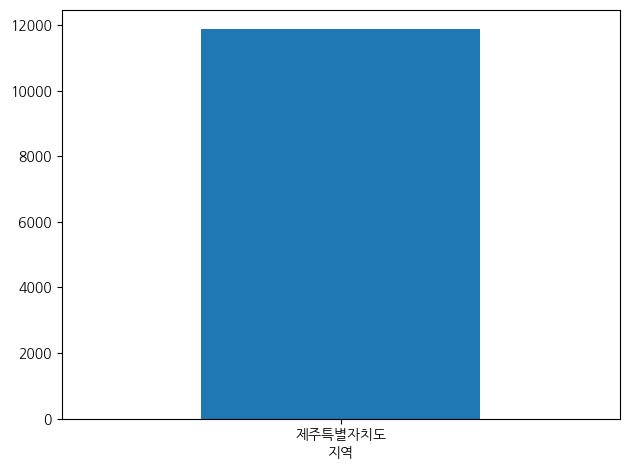

In [178]:
df_all.groupby('지역')['발전량(kWh)'].mean().plot(kind='bar')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## (8) 설비 노후도 vs 발전량

<Axes: xlabel='노후도', ylabel='발전량(kWh)'>

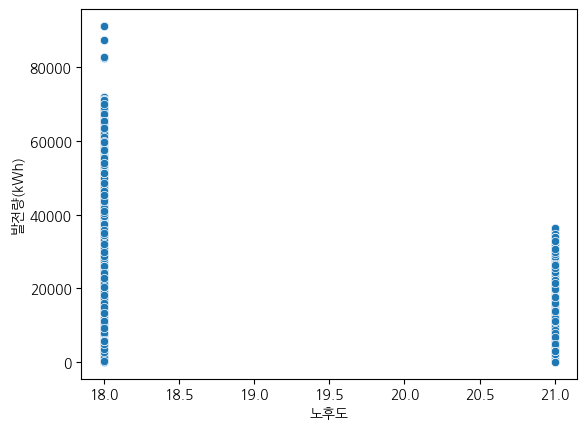

In [179]:
df_all['노후도'] = 2025 - df_all['준공년도']
sns.scatterplot(x='노후도', y='발전량(kWh)', data=df_all)

## (9) 용량 대비 실제 발전량 분석

<Axes: xlabel='지역', ylabel='발전효율'>

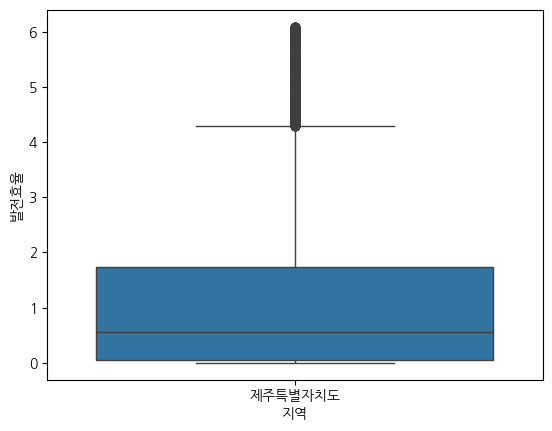

In [180]:
df_all['발전효율'] = df_all['발전량(kWh)'] / (df_all['용량(MW)'] * 1000)
sns.boxplot(x='지역', y='발전효율', data=df_all)

## (10) 일자별 발전량 시계열

<Axes: xlabel='일자'>

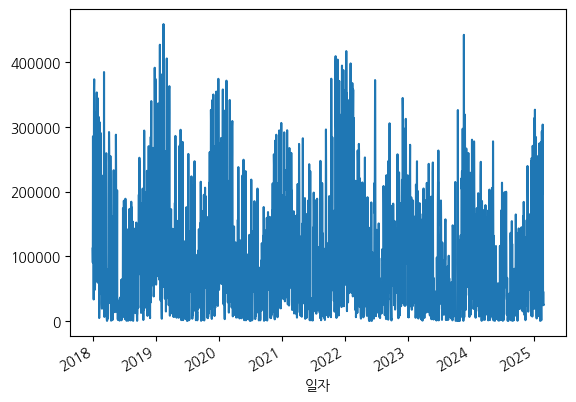

In [181]:
df_all.groupby('일자')['발전량(kWh)'].sum().plot()

## (11) 월별, 계절별 발전량 비교


<Axes: xlabel='month', ylabel='발전량(kWh)'>

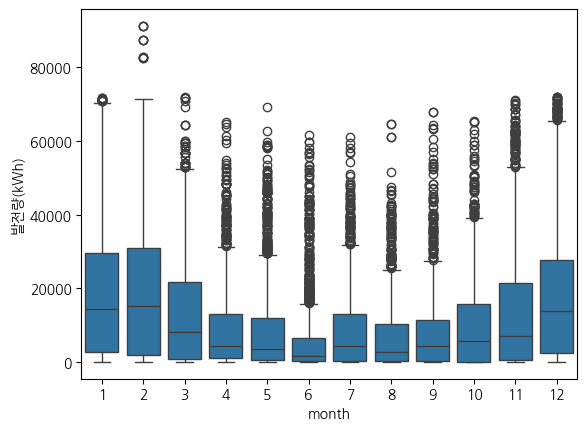

In [182]:
df_all['month'] = df_all['일자'].dt.month
sns.boxplot(x='month', y='발전량(kWh)', data=df_all)

In [183]:
df_all

,일자,터빈,발전량(kWh),풍속(m/s),풍속^3,발전소명,에너지원,구분,용량(MW),준공년도,비 고,지역,노후도,발전효율,month
0,2018-01-01,한경1호기,16001,7.7,456.533,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도,21,2.666833,1
1,2018-01-02,한경1호기,8173,6.4,262.144,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도,21,1.362167,1
2,2018-01-03,한경1호기,21213,10.2,1061.208,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도,21,3.535500,1
3,2018-01-04,한경1호기,20925,8.7,658.503,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도,21,3.487500,1
4,2018-01-05,한경1호기,24439,9.3,804.357,한경풍력 1단계(1~4호기),풍력,자체,6.0,2004,FIT,제주특별자치도,21,4.073167,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20915,2025-02-24,한경9호기,53928,13.3,2352.637,한경풍력 2단계(5~9호기),풍력,자체,15.0,2007,FIT,제주특별자치도,18,3.595200,2
20916,2025-02-25,한경9호기,4784,4.6,97.336,한경풍력 2단계(5~9호기),풍력,자체,15.0,2007,FIT,제주특별자치도,18,0.318933,2
20917,2025-02-26,한경9호기,9144,5.9,205.379,한경풍력 2단계(5~9호기),풍력,자체,15.0,2007,FIT,제주특별자치도,18,0.609600,2
20918,2025-02-27,한경9호기,5776,4.2,74.088,한경풍력 2단계(5~9호기),풍력,자체,15.0,2007,FIT,제주특별자치도,18,0.385067,2


<Axes: ylabel='지역'>

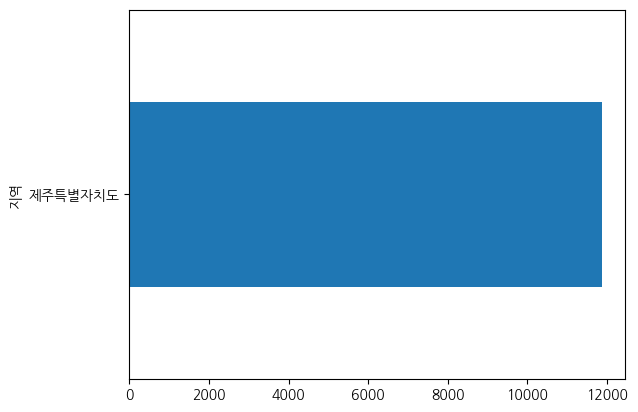

In [184]:
# 4. 위치별 발전량 비교
df_all.groupby('지역')['발전량(kWh)'].mean().sort_values().plot(kind='barh')
# 지역별 환경 차이 (예: 바람 세기, 해상/육상 위치 차이 등)가 드러날 수 있음


# 제주특별자치도가 월등히 높음 → 해상풍력 또는 강풍 지역 효과
# 지역은 단순 위치 이상으로, 풍속 분포, 지형 특성, 설치 제도 등 복합적 요인
# → 모델 입력에 '광역지역'을 범주형 변수로 넣는 것이 의미 있음

<Axes: xlabel='풍속(m/s)', ylabel='발전량(kWh)'>

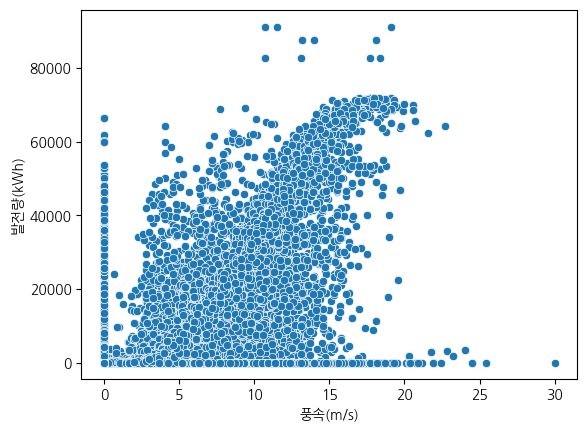

In [185]:
# 5. 풍속 vs 발전량 상관관계
import seaborn as sns
sns.scatterplot(data=df_merged, x='풍속(m/s)', y='발전량(kWh)')

# 직접적 관계 시각화 → 모델 성능 개선에 매우 중요


# 상관계수: 0.627 → 중강도의 양의 상관관계
# 산점도에서 풍속이 10m/s 이상일 때 발전량이 확실히 증가함을 확인
# 단, 0~5m/s 사이에도 발전량이 소폭 존재 → 저풍속 운전 여부 확인 필요
# 풍속은 발전량 예측에 있어 가장 강력한 연속형 feature 중 하나

In [186]:
# 필요 시 상관계수도 계산~
df_merged[['풍속(m/s)', '발전량(kWh)']].corr()

,풍속(m/s),발전량(kWh)
풍속(m/s),1.000000,0.627203
발전량(kWh),0.627203,1.000000


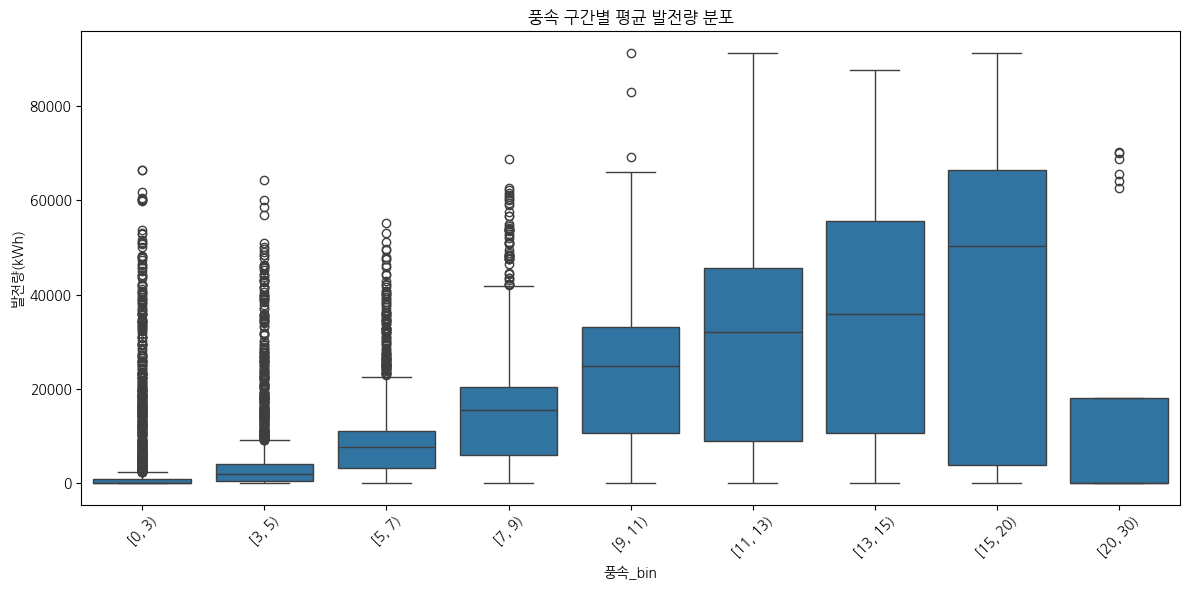

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 풍속 비닝 (구간 수는 상황에 따라 조정 가능)
df_all['풍속_bin'] = pd.cut(df_all['풍속(m/s)'], bins=[0, 3, 5, 7, 9, 11, 13, 15, 20, 30], right=False)

# boxplot 시각화
plt.figure(figsize=(12,6))
sns.boxplot(x='풍속_bin', y='발전량(kWh)', data=df_all)
plt.xticks(rotation=45)
plt.title('풍속 구간별 평균 발전량 분포')
plt.tight_layout()
plt.show()
